# SIMPLE LINEAR REGRESSION
This python jupyter  considers the simple linear regression model , that is, a model with a
single regressor x that has a relationship with a response y that is a straight line.
This simple linear regression model is
$$y = \beta_0 +\beta_1 x_1+\epsilon$$
where the intercept $\beta_0 $ and the slope $\beta_1$ are unknown constants and $\epsilon$ is a random
error component. The errors are assumed to have mean zero and unknown variance
$\sigma^2$ . Additionally we usually assume that the errors are uncorrelated. This means that
the value of one error does not depend on the value of any other error.

### About the data: 
A rocket motor is manufactured by bonding an igniter propellant and a sustainer
propellant together inside a metal housing. The shear strength of the bond between
the two types of propellant is an important quality characteristic. It is suspected that
shear strength is related to the age in weeks of the batch of sustainer propellant.
Suggests that there is a strong statistical relationship between
shear strength and propellant age, and the tentative assumption of the straight - line
model $$y = \beta_0 +\beta_1 x_1+\epsilon$$ appears to be reasonable.

### Direct Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Shear Strength(Psi) (output)
y = np.array([2158.70,1678.15,2316.00,2061.30,2207.50,1708.30,1784.70,2575.00,2357.90,2256.70,
     2165.20,2399.55,1779.80,2336.75,1765.30,2053.50,2414.40,2200.50,2654.20,1753.70])

In [3]:
# Age of Propellant,(weeks)  (input)
x= np.array([15.50,23.75,8.00,17.00,5.50,19.00,24.00,2.50,7.50,11.00,13.00,
             3.75,25.00,9.75,22.00,18.00,6.00,12.50,2.00,21.50])

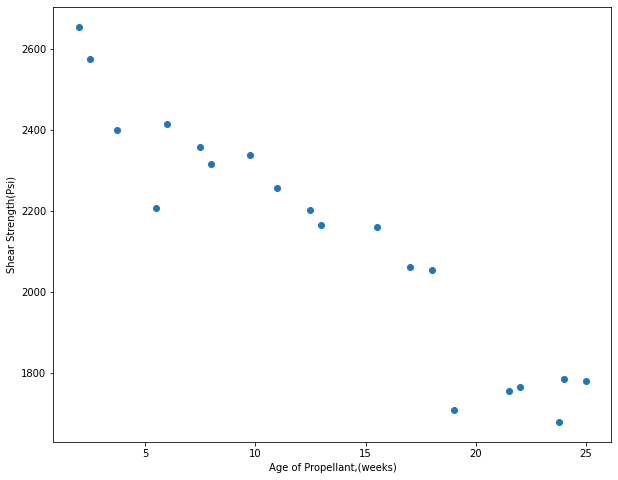

In [4]:
plt.figure(figsize=(10,8))
fig1 = plt.scatter(x,y)
plt.xlabel("Age of Propellant,(weeks)")
plt.ylabel("Shear Strength(Psi)")
plt.show()

### Estimation of $\beta_0$ and $\beta_1$
Suppose that we have $n$ pairs of data, say $(y_1, x_1),(y_2,x_2), ... ,(y_n,x_n)$.

The method of least squares is used to estimate $\beta_0$ and $\beta_1$:

At first calculate:
$$ S_{xx} =  \sum_{i=1}^n (x_i-\bar{x})^2$$
$$ S_{xy} = \sum_{i=1}^n y_i(x_i-\bar{x})$$
where $\bar{x}$ is the mean of ${x_i}$. Then:
$$\hat{\beta_1} = \dfrac{S_{xy}}{S_{xx}}$$
$$ \hat{\beta_0} = \bar{y}-\hat{\beta_1} \bar{x} $$

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print("the mean of input:  ",x_mean)
print("the mean of output: ",y_mean) 

the mean of input:   13.3625
the mean of output:  2131.3574999999996


In [6]:
S_xy = np.dot(y,x-x_mean)
S_xx = np.dot(x-x_mean,x-x_mean)
b1 = np.round(S_xy/S_xx,2)
b0 = y_mean - b1*x_mean
print("the model is y = {} {} x ".format(np.round(b0,3),np.round(b1,3)))

the model is y = 2627.774 -37.15 x 


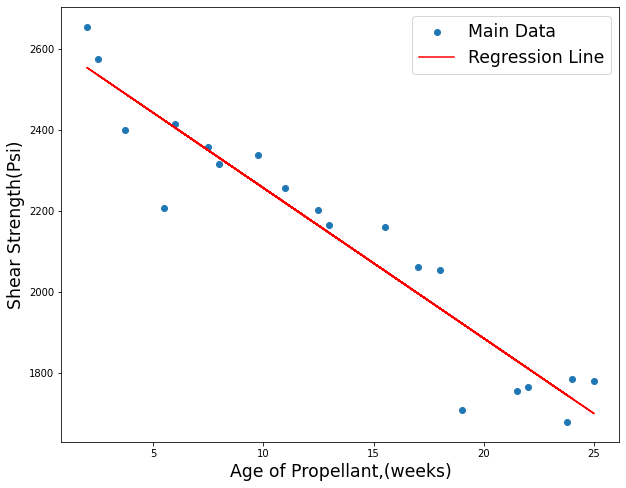

In [7]:
y_hat  = b0 + b1*x
plt.figure(figsize=(10,8))
plt.scatter(x,y,)
plt.plot(x,y_hat,'r')
plt.xlabel("Age of Propellant,(weeks)",fontsize='xx-large')
plt.ylabel("Shear Strength(Psi)",fontsize='xx-large')
plt.legend(["Main Data","Regression Line"],fontsize='xx-large')
plt.show()

### Estimation of $\sigma^2$
$$SS_{Res}= \sum e_i^2 = \sum (y_i -\hat{y}_i)^2 $$

$$ \hat{\sigma}^2 = \dfrac{SS_{Res}}{n-2} = MS_{Res}$$

Remember that this estimate of $\sigma^2$ is model dependent.

In [8]:
n=len(x)
SS_T = np.dot((y-y_mean),(y-y_mean))
SS_Res = SS_T - b1*S_xy
print(SS_Res)
sigma_hat = SS_Res / (n-2)
print(sigma_hat)

166402.49134374922
9244.582852430513


## HYPOTHESIS TESTING ON THE SLOPE AND INTERCEPT
### Use of t Tests for $\beta_1$
$$ t_0 = \dfrac{\hat{\beta}_1-\beta_{10}}{\sqrt{\frac{MS_{Res}}{S_{xx}}}} \approx t_{n-2} $$

In [9]:
Se_b1 = np.sqrt(sigma_hat/S_xx)
t_0 = b1 / Se_b1
t_0

-12.85294116510338

If we choose $ \alpha = 0.05$, the critical value of $t$ is $t_{0.025,18} = 2.101$. Thus, we would reject
$H_0 : \beta_1 = 0$ and conclude that there is a linear relationship between shear strength
and the age of the propellant.

### Use of t Test for $\beta_0$

$$t_0 = \dfrac{\hat{\beta_0}-\beta_{00}}{\sqrt{MS_{Res}(\frac{1}{n}+\frac{\bar{x}^2}{S_{xx}}})} = \dfrac{\hat{\beta_0}-\beta_{00}}{se(\hat{\beta_0})}$$

In [10]:
Se_b0 = np.sqrt(sigma_hat*(1/n+x_mean**2/S_xx))
t_0 = b0 / Se_b0
t_0

59.44716800608173

### Analysis of Variance

In [11]:
SS_R = b1*S_xy 
df_R = 1
df_Res = n-2
MS_R = SS_R / df_R
print(MS_R)
MS_Res = SS_Res / df_Res
print(MS_Res)
F = MS_R / MS_Res
print(F)

1527335.1100312509
9244.582852430513
165.2140647568209


In [12]:
from tabulate import tabulate
data = [["  Source of Variation  ", "  Sum of Square  ", "  degree of freedom  ", "  Mean Square  ", " F Statistic "],
        ["-----------------------", "-----------------", "---------------------", "---------------", "-------------"],
         ['Regression', np.round(SS_R,2), df_R, np.round(MS_R,2), np.round(F,2)],
['Residual' , np.round(SS_Res), df_Res , np.round(MS_Res,2), ' '],
['Total', np.round(SS_T), n-1 , ' ', ' ']]
print("\n")
print (tabulate(data))
print("\n")



-----------------------  -----------------  ---------------------  ---------------  -------------
Source of Variation      Sum of Square      degree of freedom      Mean Square      F Statistic
-----------------------  -----------------  ---------------------  ---------------  -------------
Regression               1527335.11         1                      1527335.11       165.21
Residual                 166402.0           18                     9244.58
Total                    1693738.0          19
-----------------------  -----------------  ---------------------  ---------------  -------------




### INTERVAL ESTIMATION IN SIMPLE LINEAR REGRESSION

If the errors are normally and independently distributed, then
$$\dfrac{\hat{\beta_1}-\beta_1}{Se(\hat{\beta_1})} \sim t_{n-2}$$
$$\dfrac{\hat{\beta_0}-\beta_0}{Se(\hat{\beta_0})} \sim t_{n-2}$$
So the confidence interval of $\beta_1$ and $\beta_0$ may be calculated as following:
$$ \hat{\beta_i} - t_{\frac{\alpha}{2},n-2} Se(\hat{\beta_i}) \leq \beta_i \leq \hat{\beta_i} + t_{\frac{\alpha}{2},n-2} Se(\hat{\beta_i}), ~~~ i=0,1$$
Moreover:
$$ \dfrac{(n-2)MS_{Res}}{\sigma^2} \sim \chi^2_{n-2}$$
and then 
$$ \dfrac{(n-2)MS_{Res}}{\chi^2_{\frac{\alpha}{2},n-2}} \leq \sigma^2 \leq \dfrac{(n-2)MS_{Res}}{\chi^2_{1-\frac{\alpha}{2},n-2}}$$

In [13]:
# low bound and up bound beta_0
# n=20, so t=2.101
t_18 = 2.101
lb_0 = b0 - t_18*Se_b0
ub_0 = b0 + t_18*Se_b0
print("the lower bound is:  ", lb_0)
print("the upper bound is:  ", ub_0)

the lower bound is:   2534.9027690504918
the upper bound is:   2720.6459809495072


In [14]:
# lower bound and upper bound beta_1
# n=20, so t=2.101
t_18 = 2.101
lb_1 = b1 - t_18*Se_b1
ub_1 = b1 + t_18*Se_b1
print("the lower bound is:  ", lb_1)
print("the upper bound is:  ", ub_1)

the lower bound is:   -43.222707328025194
the upper bound is:   -31.077292671974803


In [15]:
# lower bound and upper bound sigma squared
# n=20, so chi_0.025,18 = 31 . 5 and chi_0.975,18 = 8.23
C_2518 = 31.5
C_97518 = 8.23
ls2 = (n-2)*MS_Res / C_2518 
us2 = (n-2)*MS_Res / C_97518
print("the lower bound is:  ", ls2)
print("the upper bound is:  ", us2)

the lower bound is:   5282.6187728174355
the upper bound is:   20219.014744076452


### Plot the result

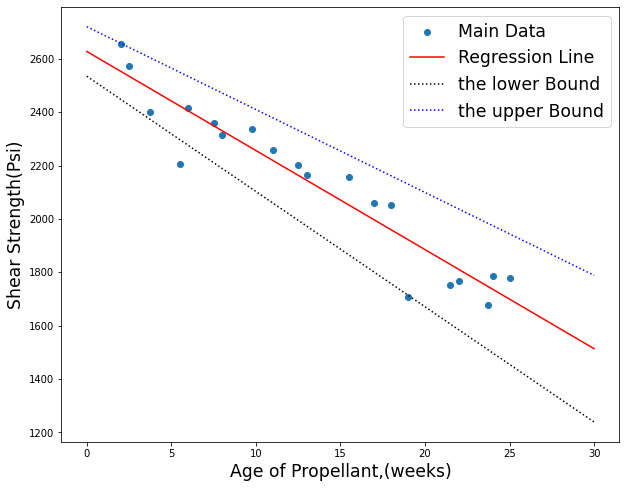

In [16]:
x_ = np.linspace(0,30,)
y_hat = b0 + b1*x_
y_hat_low  = lb_0 + lb_1*x_
y_hat_up = ub_0 + ub_1*x_
plt.figure(figsize=(10,8))
plt.scatter(x,y,)
plt.plot(x_,y_hat,'r')
plt.plot(x_,y_hat_low,'k:')
plt.plot(x_,y_hat_up,'b:')
plt.xlabel("Age of Propellant,(weeks)",fontsize='xx-large')
plt.ylabel("Shear Strength(Psi)",fontsize='xx-large')
plt.legend(["Main Data","Regression Line","the lower Bound", "the upper Bound"],fontsize='xx-large')
plt.show()

###  Interval Estimation of the Mean Response
A major use of a regression model is to estimate the mean response E(y) for a particular value of the regressor variable x.
Let $x_0$ be the level of the regressor variable for which we wish to estimate the mean response, say $E(y|x_0)$.

An unbiased point estimator of $E(y|x_0)$ is found from the fitted model as
$$ \hat{E[y|x_0]} = \hat{\mu}_{y|x_0} =\hat{\beta}_0+\hat{\beta}_1 x_0$$
Moreover:
$$Var(\hat{\mu}_{y|x_0}) = \sigma^2 \left[ \dfrac{1}{n} + \dfrac{(x_0-\bar{x})^2}{S_{xx}} \right]$$
and
$$ \dfrac{\hat{\mu}_{y|x_0}-E[y|x_0]}{\sqrt{MS_{Res} \left(\dfrac{1}{n} + \dfrac{(x_0-\bar{x})^2}{S_{xx}} \right)}} \sim t_{n-2}$$
Finally if we define $A$ as follow
$$ A = t_{\frac{\alpha}{2},n-2} \sqrt{MS_{Res} \left(\dfrac{1}{n} + \dfrac{(x_0-\bar{x})^2}{S_{xx}} \right)}$$
then we have
$$ \hat{\mu}_{y|x_0} -A \leq E(y|x_0) \leq \hat{\mu}_{y|x_0} +A$$

In [17]:
# mean response estimation for a single input x0
# n=20, so t=2.101
t_18 = 2.101
x0 = 13.3625
Ey_x0 = b0+b1*x0   # E[y|x0] 
A = t_18 * np.sqrt(MS_Res *(1/n +(x0-x_mean)**2/S_xx))
Lower_MR = Ey_x0 - A
Upper_MR = Ey_x0 + A
print(" The lower bound of mean response of ", x0, " is ", np.round(Lower_MR,2))
print(" The upper bound of mean response of ", x0, " is ", np.round(Upper_MR,2))

 The lower bound of mean response of  13.3625  is  2086.19
 The upper bound of mean response of  13.3625  is  2176.53


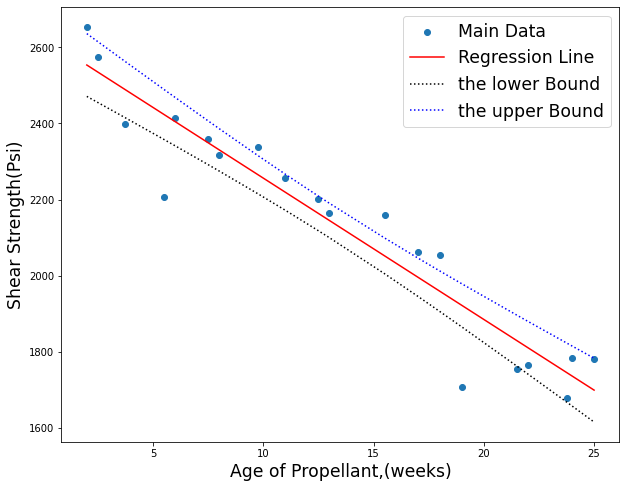

In [18]:
# mean response estimation for all input data
# n=20, so t=2.101
t_18 = 2.101
x_sort = np.sort(x)   # for good plot we should sort the input data
y_hat = b0 + b1*x_sort
Ey_x = b0+b1*x_sort   # E[y|x0] 
B = t_18 * np.sqrt(MS_Res *(1/n +(x_sort-x_mean)**2/S_xx))
Lower_MR = Ey_x - B
Upper_MR = Ey_x + B
plt.figure(figsize=(10,8))
plt.scatter(x,y,)
plt.plot(x_sort,y_hat,'r')
plt.plot(x_sort,Lower_MR,'k:')
plt.plot(x_sort,Upper_MR,'b:')
plt.xlabel("Age of Propellant,(weeks)",fontsize='xx-large')
plt.ylabel("Shear Strength(Psi)",fontsize='xx-large')
plt.legend(["Main Data","Regression Line","the lower Bound", "the upper Bound"],fontsize='xx-large')
plt.show()

### PREDICTION OF NEW OBSERVATIONS
An important application of the regression model is prediction of new observations y corresponding to a specifi ed level of the regressor variable x. Let $x_0$ is a new observation then an estimation of $y_0$ is
$$ \hat{y_0} =\hat{\beta}_0+\hat{\beta}_1 x_0$$
Moreover:
$$Var(y_0 - \hat{y}_0) = \sigma^2 \left[ 1+\dfrac{1}{n} + \dfrac{(x_0-\bar{x})^2}{S_{xx}} \right]$$
And if we define $A$ as follow
$$ A = t_{\frac{\alpha}{2},n-2} \sqrt{MS_{Res} \left(1+\dfrac{1}{n} + \dfrac{(x_0-\bar{x})^2}{S_{xx}} \right)}$$
then we have
$$ \hat{y}_0 -A \leq y_0 \leq \hat{y}_0 +A$$

In [19]:
# mean response estimation for a single input x0
# n=20, so t=2.101
t_18 = 2.101
x0 = 10
Ey_x0 = b0+b1*x0   # E[y|x0] 
A = t_18 * np.sqrt(MS_Res *(1+1/n +(x0-x_mean)**2/S_xx))
Lower_MR = Ey_x0 - A
Upper_MR = Ey_x0 + A
print(" The lower bound of mean response of ", x0, " is ", np.round(Lower_MR,2))
print(" The upper bound of mean response of ", x0, " is ", np.round(Upper_MR,2))

 The lower bound of mean response of  10  is  2048.27
 The upper bound of mean response of  10  is  2464.28


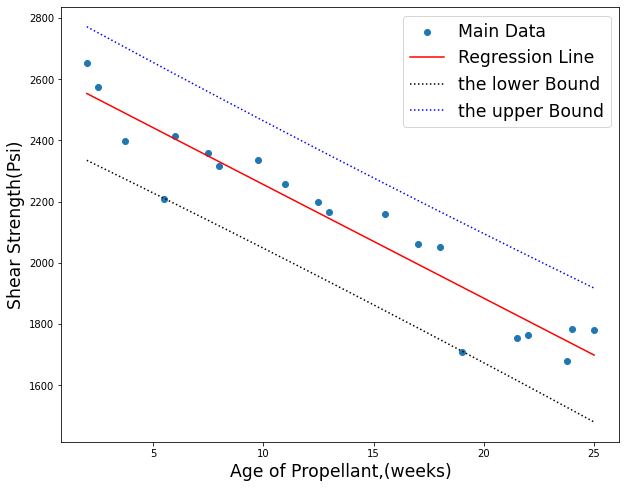

In [20]:
# mean response estimation for all input data
# n=20, so t=2.101
t_18 = 2.101
x_sort = np.sort(x)   # for good plot we should sort the input data
y_hat = b0 + b1*x_sort
Ey_x = b0+b1*x_sort   # E[y|x0] 
B = t_18 * np.sqrt(MS_Res *(1+1/n +(x_sort-x_mean)**2/S_xx))
Lower_MR = Ey_x - B
Upper_MR = Ey_x + B
plt.figure(figsize=(10,8))
plt.scatter(x,y,)
plt.plot(x_sort,y_hat,'r')
plt.plot(x_sort,Lower_MR,'k:')
plt.plot(x_sort,Upper_MR,'b:')
plt.xlabel("Age of Propellant,(weeks)",fontsize='xx-large')
plt.ylabel("Shear Strength(Psi)",fontsize='xx-large')
plt.legend(["Main Data","Regression Line","the lower Bound", "the upper Bound"],fontsize='xx-large')
plt.show()

### COEFFICIENT OF DETERMINATION
The quantity 
$$ R^2 =  \dfrac{SS_R}{SS_T} = 1-\dfrac{SS_{Res}}{SS_T}$$ 
is called the coeffi cient of determination. Of course we have the adjusted $R^2$:
$$ \bar{R}^2 = 1-\dfrac{\frac{SS_{Res}}{df_{Res}}}{\frac{SS_T}{n-1}}$$

Note:

1) The statistic $R^2$ should be used with caution, since it is always possible to make $R$ large by adding enough terms to the model.
2) Although $R^2$ cannot decrease if we add a regressor variable to the model, this does not necessarily mean the new model is superior to the old one. Unless the error sum of squares in the new model is reduced by an amount equal to the original error mean square, the new model will have a larger error mean square than the old one because of the loss of one degree of freedom for error. Thus, the new model will actually be worse than the old one.
3) The magnitude of $R^2$ also depends on the range of variability in the regressor variable. Generally R 2 will increase as the spread of the x ’ s increases and decrease as the spread of the x ’ s decreases provided the assumed model form is correct. By the delta method (also see Hahn 1973 ), one can show that the expected value of $R^2$ from a straight - line regression is approximately
$$ E(R^2) \approx \dfrac{\frac{\beta_1^2 S_{xx}}{n-1}}{\frac{\beta_1^2 S_{xx}}{n-1}+\sigma^2}$$

In general, $R^2$ does not measure he magnitude of the slope of the regression line. A large value of $R^2$ does not imply a steep slope. Furthermore, $R^2$ does not measure the appropriateness of the linear odel, for $R^2$ will often be large even though y and x are nonlinearly related. Remember that although $R^2$ is large, this does not necessarily imply that the regression model will be an accurate predictor.

In [31]:
# computing The R-squared
R_Sq = 1 - SS_Res /SS_T
print(R_Sq)

0.9017542674800032


In [32]:
# computing The adjusted R-squared
AR_Sq = 1 - (SS_Res/df_Res) /(SS_T/(n-1))
print(AR_Sq)

0.8962961712288923


In [33]:
M_xx = b1**2 * (S_xx) / (n-1)
ER_Sq =M_xx /(M_xx+sigma_hat**2)
print(ER_Sq)

0.000939627788431692
